In [1]:
from polarspike import Overview, spiketrain_plots
from bokeh.plotting import show
from bokeh.io import output_notebook
from importlib import reload
import numpy as np

output_notebook()

Loading BokehJS ...

# Polarspike plotting
Here I will give an overview over the different ways you can plot spike trains. </br>
I will highlight the different usecases for the different ways of plotting data and give different examples.

### Loading recording and spikes


In [2]:
recording = Overview.Recording.load(r"D:\zebrafish_21_11_23\ks_sorted\overview")

Lets look at the stimuli in this recording

In [3]:
recording.stimulus_df

stimulus_name   begin_fr     end_fr  \
0                    FFF     351356    5153682   
1                  Chirp    5672886    8582856   
2         Contrast_Steps    9771394   16974875   
3               FF_Noise   17969182   27969019   
4            Moving_Bars   37404432   48071733   
5                    FFF   49429932   54232259   
6                  Chirp   56415740   59325732   
7         Contrast_Steps   66133810   73337293   
8               FF_Noise   73930638   83930486   
9               Chirp610   86112793   89022497   
10              Chirp560   95291187   98201687   
11              Chirp530   99116072  102026586   
12              Chirp460  103181592  106092101   
13              Chirp413  106841196  109751701   
14                   FFF  110521193  115323516   
15  BW_Noise_shuffle_4px  118875673  214874431   
16                   FFF  220822375  225624690   
17                 Chirp  226142445  229052428   
18        Contrast_Steps  231102849  238306330   
19              FF_Noise  238757923  248757762   
20              Chirp610  252632873  255542591   
21              Chirp560  256442544  259353049   
22              Chirp530  260819898  263730399   
23              Chirp460  265385882  268296387   
24              Chirp413  268523901  271434414   
25                 Chirp  276275527  279185484   
26   G_Noise_shuffle_4px  283275593  379273885   
27   B_Noise_shuffle_2px  382916233  478780415   
28        Contrast_Steps  480054519  487257999   
29                 Chirp  487583161  490493140   
30                   FFF  491985879  496788204   

                                  trigger_fr_relative  \
0   [0, 80040, 160079, 240118, 320156, 400195, 480...   
1   [0, 60240, 727504, 787728, 1454992, 1515216, 2...   
2   [0, 80034, 160073, 240112, 320150, 400189, 480...   
3   [0, 996, 1996, 2996, 3996, 4996, 5996, 6996, 7...   
4   [0, 282, 593, 947, 1278, 1611, 1945, 2274, 260...   
5   [0, 80041, 160079, 240118, 320157, 400196, 480...   
6   [0, 60235, 727507, 787743, 1455008, 1515231, 2...   
7   [0, 80038, 160076, 240114, 320153, 400192, 480...   
8   [0, 1004, 2004, 3004, 4004, 5004, 6004, 7004, ...   
9   [0, 60185, 727418, 787613, 1454848, 1515041, 2...   
10  [0, 60183, 727614, 787811, 1455243, 1515440, 2...   
11  [0, 60197, 727629, 787825, 1455256, 1515453, 2...   
12  [0, 60191, 727624, 787820, 1455252, 1515448, 2...   
13  [0, 60189, 727621, 787817, 1455249, 1515445, 2...   
14  [0, 80038, 160077, 240116, 320154, 400193, 480...   
15  [0, 793, 1791, 2791, 3791, 4791, 5791, 6795, 7...   
16  [0, 80031, 160069, 240108, 320147, 400185, 480...   
17  [0, 60230, 727498, 787738, 1455005, 1515226, 2...   
18  [0, 80035, 160073, 240112, 320151, 400189, 480...   
19  [0, 999, 1999, 2999, 3999, 4998, 5998, 6998, 7...   
20  [0, 60198, 727433, 787626, 1454860, 1515054, 2...   
21  [0, 60186, 727620, 787814, 1455248, 1515442, 2...   
22  [0, 60182, 727615, 787810, 1455244, 1515438, 2...   
23  [0, 60184, 727617, 787813, 1455245, 1515441, 2...   
24  [0, 60195, 727628, 787824, 1455256, 1515452, 2...   
25  [0, 60225, 727492, 787713, 1454980, 1515202, 2...   
26  [0, 783, 1776, 2776, 3774, 4775, 5777, 6775, 7...   
27  [0, 369, 690, 1054, 1379, 1715, 2051, 2384, 27...   
28  [0, 80035, 160073, 240112, 320150, 400189, 480...   
29  [0, 60223, 727494, 787731, 1454996, 1515220, 2...   
30  [0, 80040, 160079, 240118, 320156, 400195, 480...   

                                          trigger_int  stimulus_index  \
0   [80040, 80039, 80039, 80038, 80039, 80039, 800...               0   
1   [60240, 667264, 60224, 667264, 60224, 667265, ...               1   
2   [80034, 80039, 80039, 80038, 80039, 80039, 800...               2   
3   [996, 1000, 1000, 1000, 1000, 1000, 1000, 1000...               3   
4   [282, 311, 354, 331, 333, 334, 329, 335, 332, ...               4   
5   [80041, 80038, 80039, 80039, 80039, 80038, 800...               5   
6   [60235, 667272, 60236, 667265, 60223, 667266, ...               6   
7

## Single cell raster plot
In its simplest form, this plot just takes in the spikes dataframe and plots all spikes as if there were a single cell. </br>
For this, the <b> indices </b> argument needs to be set to "repeat".

In [4]:
spikes = recording.get_spikes_triggered([[0]], [[2]])

In [5]:
reload(spiketrain_plots)
fig = spiketrain_plots.spikes_and_trace(spikes, indices=["repeat"])

In [6]:
show(fig)

Keep in mind that spikes of two independent cells will be plotted on top of each other when the function is used like this.

In [7]:
spikes = recording.get_spikes_triggered([[0]], [[2, 3]])
fig = spiketrain_plots.spikes_and_trace(spikes, indices=["repeat"])
show(fig)

We can also plot two different cells on top of each other by adding the index "cell_index" to the list of indices.

In [8]:
spikes = recording.get_spikes_triggered([[0]], [[2, 3]])
fig = spiketrain_plots.spikes_and_trace(spikes, indices=["cell_index", "repeat"])
show(fig)

We might want to show these two cells in different colours:

In [9]:
spikes = recording.get_spikes_triggered([[0]], [[2, 3]])
fig = spiketrain_plots.spikes_and_trace(spikes, indices=["cell_index", "repeat"], line_colour=["red", "black"])
show(fig)

When dealing with more than two cells, we can either choose two or more alternating colours or choose as many colours as cells.

In [10]:
spikes = recording.get_spikes_triggered([[0]], [[2, 3, 5]])
fig = spiketrain_plots.spikes_and_trace(spikes, indices=["cell_index", "repeat"], line_colour=["red", "black"])
show(fig)

In [11]:
spikes = recording.get_spikes_triggered([[0]], [[2, 3, 5]])
fig = spiketrain_plots.spikes_and_trace(spikes, indices=["cell_index", "repeat"], line_colour=["red", "black", "green"])
show(fig)

We might want to summ the traces of multiple cells, rather than plotting one trace for each cell:

In [12]:
spikes = recording.get_spikes_triggered([[0]], [[2, 3, 5]])
fig = spiketrain_plots.spikes_and_trace(spikes, indices=["cell_index", "repeat"], line_colour=["red", "black", "green"],
                                        single_psth=True)
show(fig)

We can choose any indices to aggregate the raster plot. Here, I will show how to plot the responses of two cells for two different FFF stimuli.
First, we can combine the spikes for both FFF stimuli per cell_index and repeat

In [13]:
spikes = recording.get_spikes_triggered([[0, 5]], [[2, 3]])
fig = spiketrain_plots.spikes_and_trace(spikes, indices=["cell_index", "repeat"], line_colour=["red", "black", "green"])
show(fig)

Or, we aggregate over stimulus_index as well:spikes = recording.get_spikes_triggered([[0, 5]], [[2, 3]])
fig = spiketrain_plots.spikes_and_trace(spikes, indices=["cell_index", "repeat"], line_colour=["red", "black", "green"])
show(fig)

In [14]:
spikes = recording.get_spikes_triggered([[0, 5]], [[2, 3]])
fig = spiketrain_plots.spikes_and_trace(spikes, indices=["stimulus_index", "cell_index", "repeat"],
                                        line_colour=["red", "black", "green"])
show(fig)

We can collapse the traces into a single one per stimulus, by removing "repeat" from the aggregation indices list.
This might help to identify trends over time.


In [15]:
reload(spiketrain_plots)
spikes = recording.get_spikes_triggered([[0, 5]], [[2, 3]])
fig = spiketrain_plots.spikes_and_trace(spikes, indices=["stimulus_index", "cell_index"], line_colour=["red", "black"])
show(fig)

Since the first index carries the colour, we get a different colour for the traces if which swap oder of indices:

In [16]:
spikes = recording.get_spikes_triggered([[0, 5]], [[2, 3]])
fig = spiketrain_plots.spikes_and_trace(spikes, indices=["cell_index", "stimulus_index"], line_colour=["red", "black"])
show(fig)

## Many cells
When dealing with many more cells and spikes, the raster plot becomes less and less easy to read, even if we dont show every repeat.

In [17]:
spikes = recording.get_spikes_triggered([[0, 5]], [np.arange(0, 10).tolist()])
fig = spiketrain_plots.spikes_and_trace(spikes, indices=["cell_index", "stimulus_index"], line_colour=["red", "black"])
show(fig)

## Datashader plots
This is were the datashader plots come in handy. Instead of plotting every single spikes as a marker, here a heatmap is created which on which the individual spikes are mapped on.

In [18]:
spikes

cell_index       times  times_relative  trigger  repeat  \
0               0    17.60685         0.03905        0       0   
1               0    17.68590         0.11810        0       0   
2               0    17.88090         0.31310        0       0   
3               0    18.14525         0.57745        0       0   
4               0    18.17340         0.60560        0       0   
...           ...         ...             ...      ...     ...   
19794           9  2710.99520       239.49860        5       9   
19795           9  2711.24775       239.75115        5       9   
19796           9  2711.33000       239.83340        5       9   
19797           9  2711.43505       239.93845        5       9   
19798           9  2711.59025       240.09365        5       9   

       times_triggered  stimulus_index  
0              0.03905               0  
1              0.11810               0  
2              0.31310               0  
3              0.57745               0  
4              0.60560               0  
...                ...             ...  
19794         23.39395               5  
19795         23.64650               5  
19796         23.72875               5  
19797         23.83380               5  
19798         23.98900               5  

[19799 rows x 7 columns]

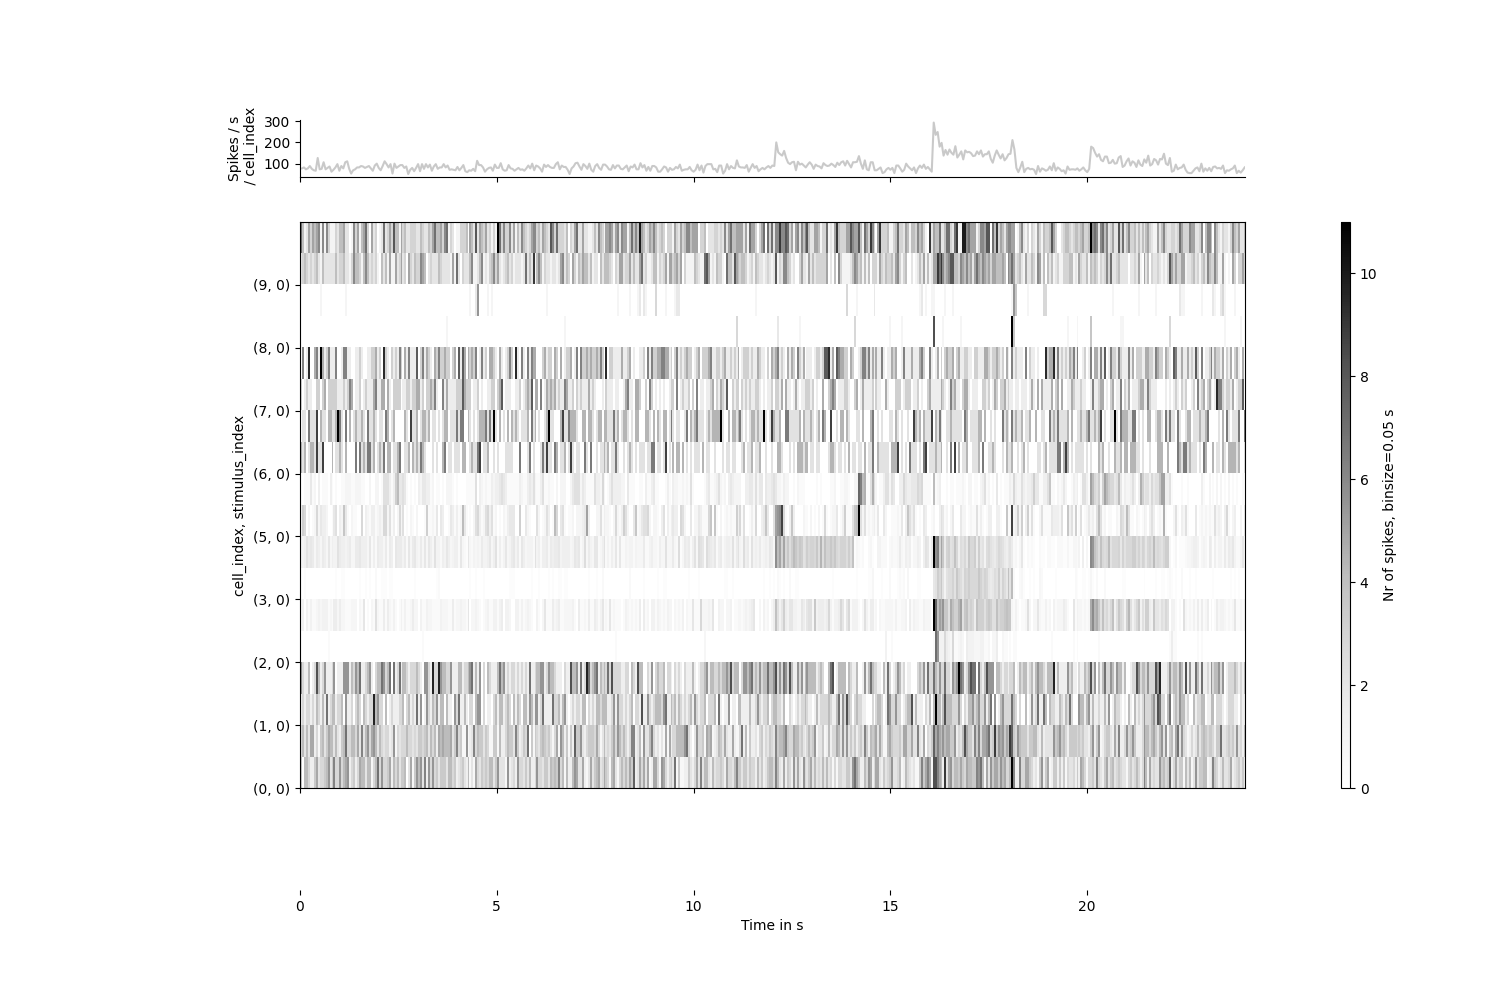

In [19]:
%matplotlib widget
reload(spiketrain_plots)
spikes = recording.get_spikes_triggered([[0, 5]], [np.arange(0, 10).tolist()])
fig, ax = spiketrain_plots.whole_stimulus(spikes, indices=["cell_index", "stimulus_index"], width=15)

We can also create different coloured heatmaps (which are normalized to the same values)

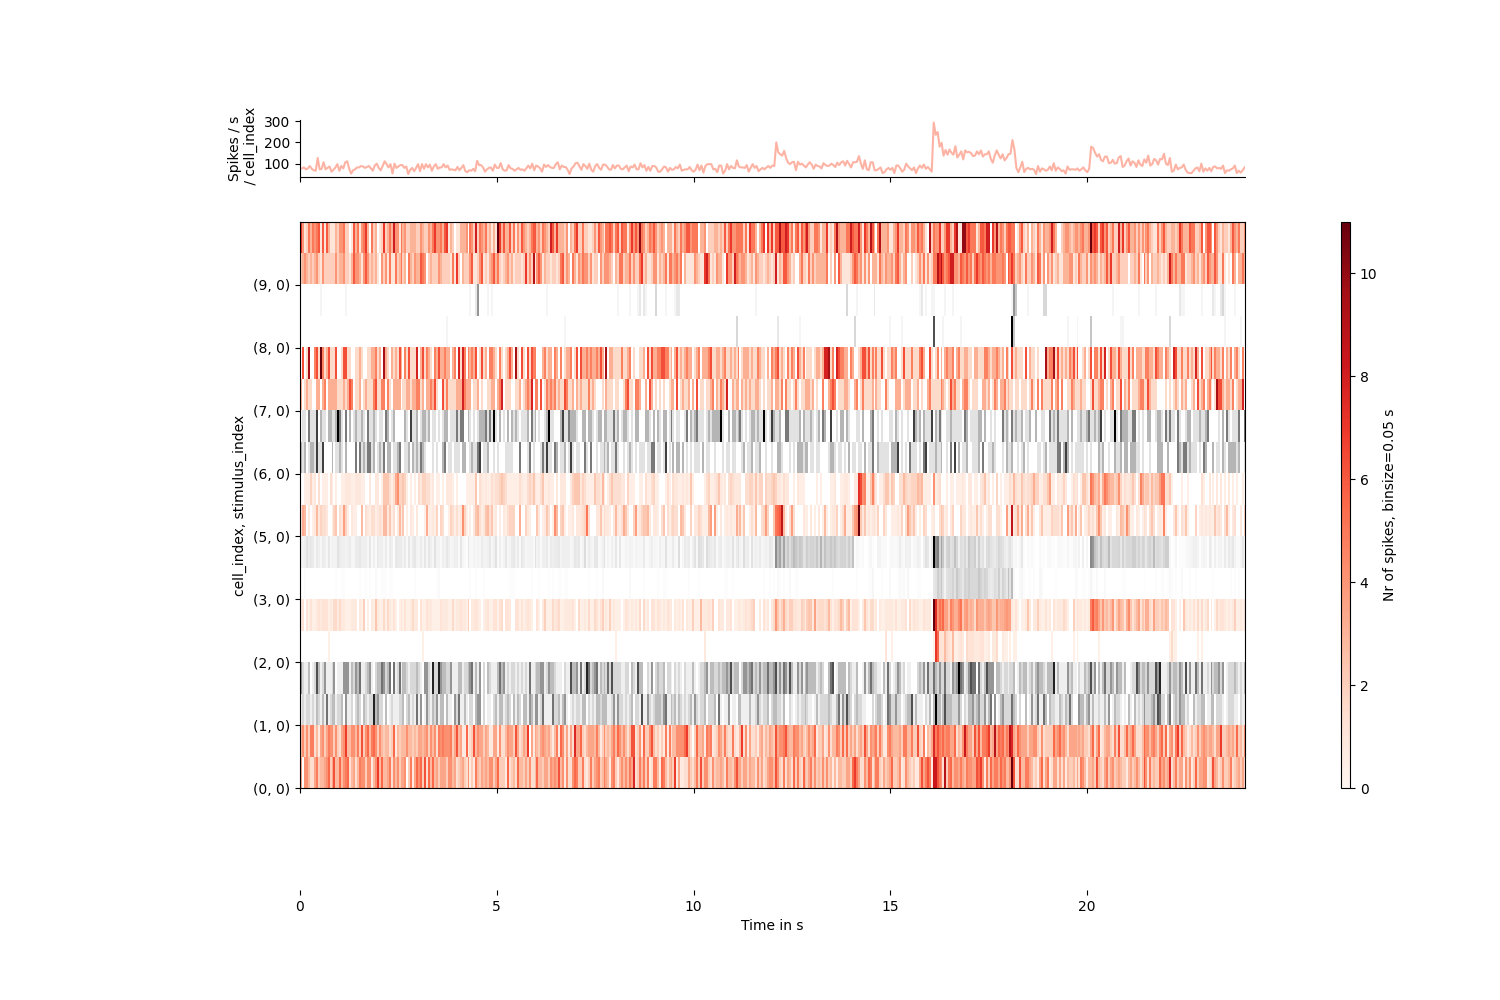

In [20]:
%matplotlib widget
spikes = recording.get_spikes_triggered([[0, 5]], [np.arange(0, 10).tolist()])
fig, ax = spiketrain_plots.whole_stimulus(spikes, indices=["cell_index", "stimulus_index"], width=15,
                                          cmap=["Reds", "Greys"])

We can plot many more cells this way

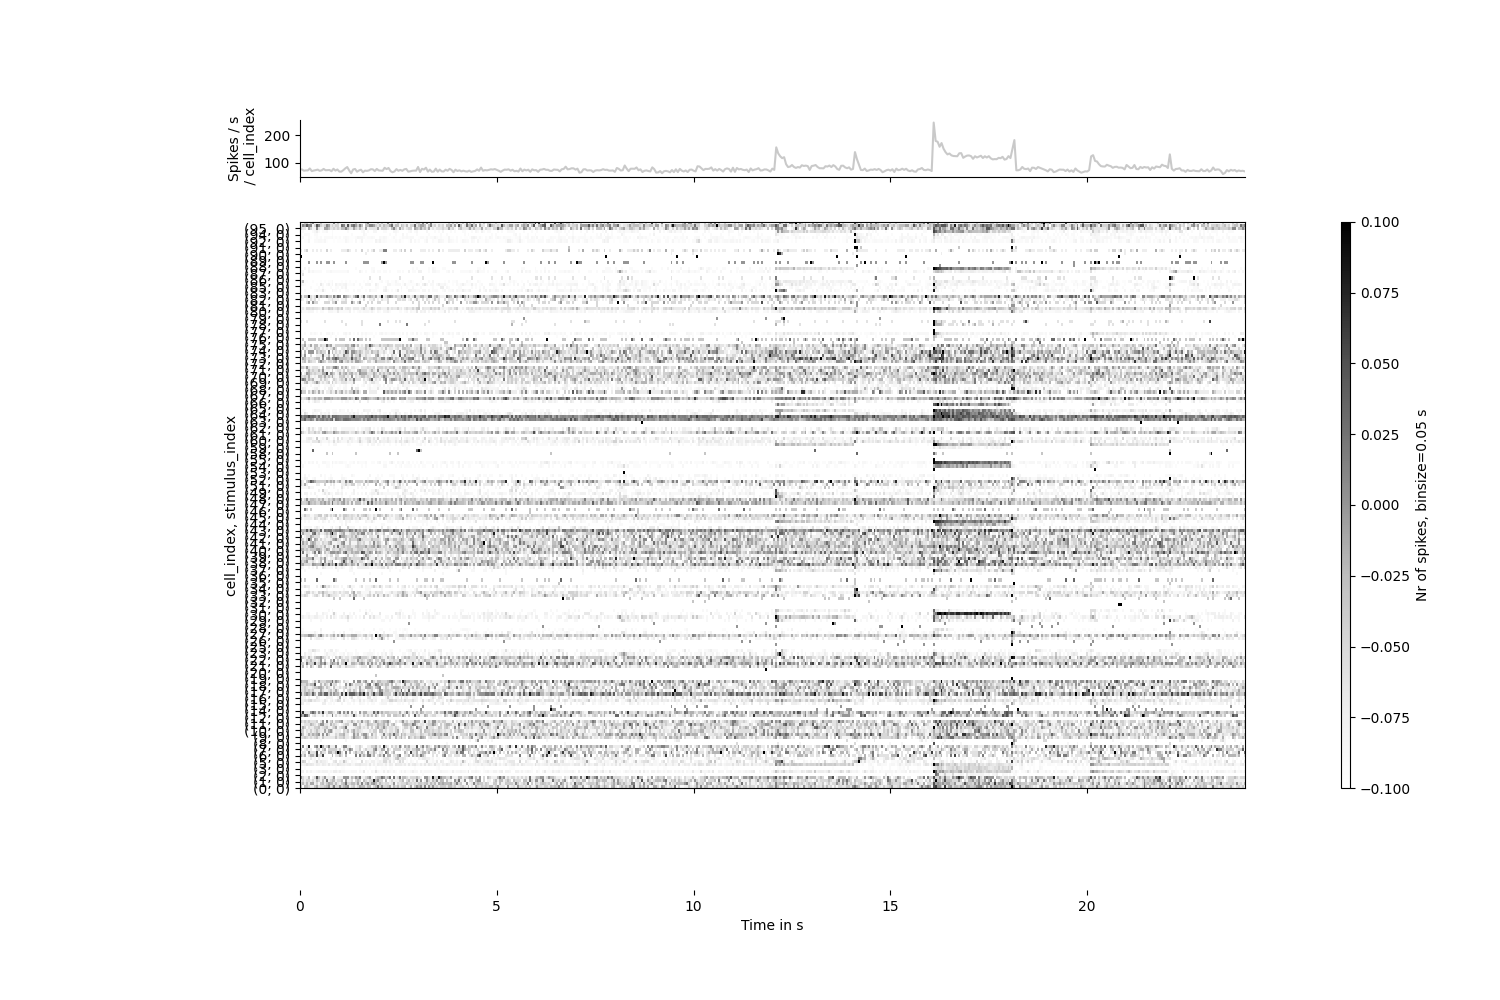

In [21]:
%matplotlib widget
reload(spiketrain_plots)
spikes = recording.get_spikes_triggered([[0, 5]], [np.arange(0, 100).tolist()])
fig, ax = spiketrain_plots.whole_stimulus(spikes, indices=["cell_index", "stimulus_index"], width=15, cmap="Greys")